##### Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##### Loading Data

In [29]:
db = pd.read_csv('rentals_3bedr_Abu_Dhabi_2.csv')

##### Viewing first 5 rows
##### Viewing generalized information
##### Get number of rows, max and min price of properties and mean price of properties

In [31]:
print(db.head(), "\n")
print(db.info(), "\n")
print("Number of rows: ", len(db), "\n")
print("Maximum Price: ", db['Price'].max(), "\nMinimum Price: ", db['Price'].min(), "\n")
print("Mean Price: ", db['Price'].mean())

    Price  Nr Bedrooms  Nr Bathrooms                   Location  Size  \
0  130000            3           5.0   Al Khalidiyah, Abu Dhabi  2500   
1   60000            3           3.0   Al Khalidiyah, Abu Dhabi  1800   
2   80400            3           3.0   Al Khalidiyah, Abu Dhabi  1900   
3   78000            3           3.0   Al Khalidiyah, Abu Dhabi  2000   
4   60000            3           3.0   Al Khalidiyah, Abu Dhabi  1600   

  Unnamed: 5       City  
0       sqft  Abu Dhabi  
1       sqft  Abu Dhabi  
2       sqft  Abu Dhabi  
3       sqft  Abu Dhabi  
4       sqft  Abu Dhabi   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         322 non-null    int64  
 1   Nr Bedrooms   322 non-null    int64  
 2   Nr Bathrooms  321 non-null    float64
 3   Location      322 non-null    object 
 4   Size          322 non-null    int64 

### Plotting

counts stores the count for each bar

patches stores the rectangle of each bar

array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ])

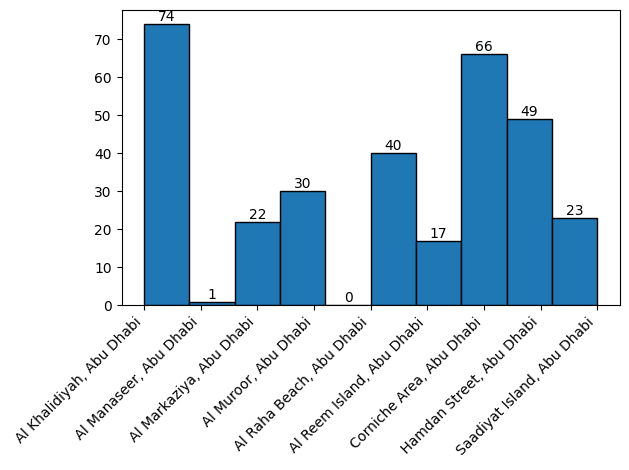

In [44]:
counts, bins, patches = plt.hist(db['Location'], bins=10, edgecolor='black')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2, 
             counts[i],
             int(counts[i]),
             ha='center',
             va='bottom')

plt.tight_layout()